In [2]:

%load_ext autoreload
%autoreload 2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [366]:
import matplotlib as mpl
from pathlib import Path
thesis_dir = Path("/home/pol_schiessel/maya620d/pol/Projects/Thesis")
# --- publication‐style rcParams ---
mpl.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,          # base font size (used if specific sizes not given)
    'axes.labelsize': 14,     # x/y label font size
    'axes.labelweight': 'bold',   # make x/y label text bold
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',   # (optional) bold titles too
    'xtick.labelsize': 12,    # tick number font size (x)
    'ytick.labelsize': 12,    # tick number font size (y)
    'axes.linewidth': 1.0,
    'lines.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'figure.dpi': 200,
    'savefig.dpi': 200,
    'legend.fontsize': 12,
    'legend.frameon': True,
    'svg.fonttype': 'none',
    # --- added to pull labels closer ---
    'axes.labelpad': 1,        # distance axis spine <-> axis label (default ~4)
    'axes.titlepad': 2,        # distance title <-> top of axes (lower if you want closer)
    'xtick.major.pad': 2,      # distance tick labels <-> axis
    'ytick.major.pad': 2,
    'xtick.minor.pad': 2,
    'ytick.minor.pad': 2,
})

In [367]:

P1tsv_path = "/home/pol_schiessel/maya620d/pol/Projects/Codebase/Spermatogensis/data/external/Moritz_WTP1_ESMA.tsv"
P2tsv_path = "/home/pol_schiessel/maya620d/pol/Projects/Codebase/Spermatogensis/data/external/Moritz_WTP2_ESMA.tsv"

# The file has no header: assign column names
dfP1 = pd.read_csv(P1tsv_path, sep="\t")
dfP2 = pd.read_csv(P2tsv_path, sep="\t")

# Ensure numeric types
dfP1["P1C_nM"] = pd.to_numeric(dfP1["P1C_nM"], errors="coerce")
dfP1["P1_Bound_perc"] = pd.to_numeric(dfP1["P1_Bound_perc"], errors="coerce")
dfP1.loc[dfP1["P1_Bound_perc"] < 0, "P1_Bound_perc"] = 0

dfP2["P2C_nM"] = pd.to_numeric(dfP2["P2C_nM"], errors="coerce")
dfP2["P2_Bound_perc"] = pd.to_numeric(dfP2["P2_Bound_perc"], errors="coerce")
dfP2.loc[dfP2["P2_Bound_perc"] < 0, "P2_Bound_perc"] = 0

# df = df.dropna(subset=["P1C_nM", "P1_Bound_perc"])

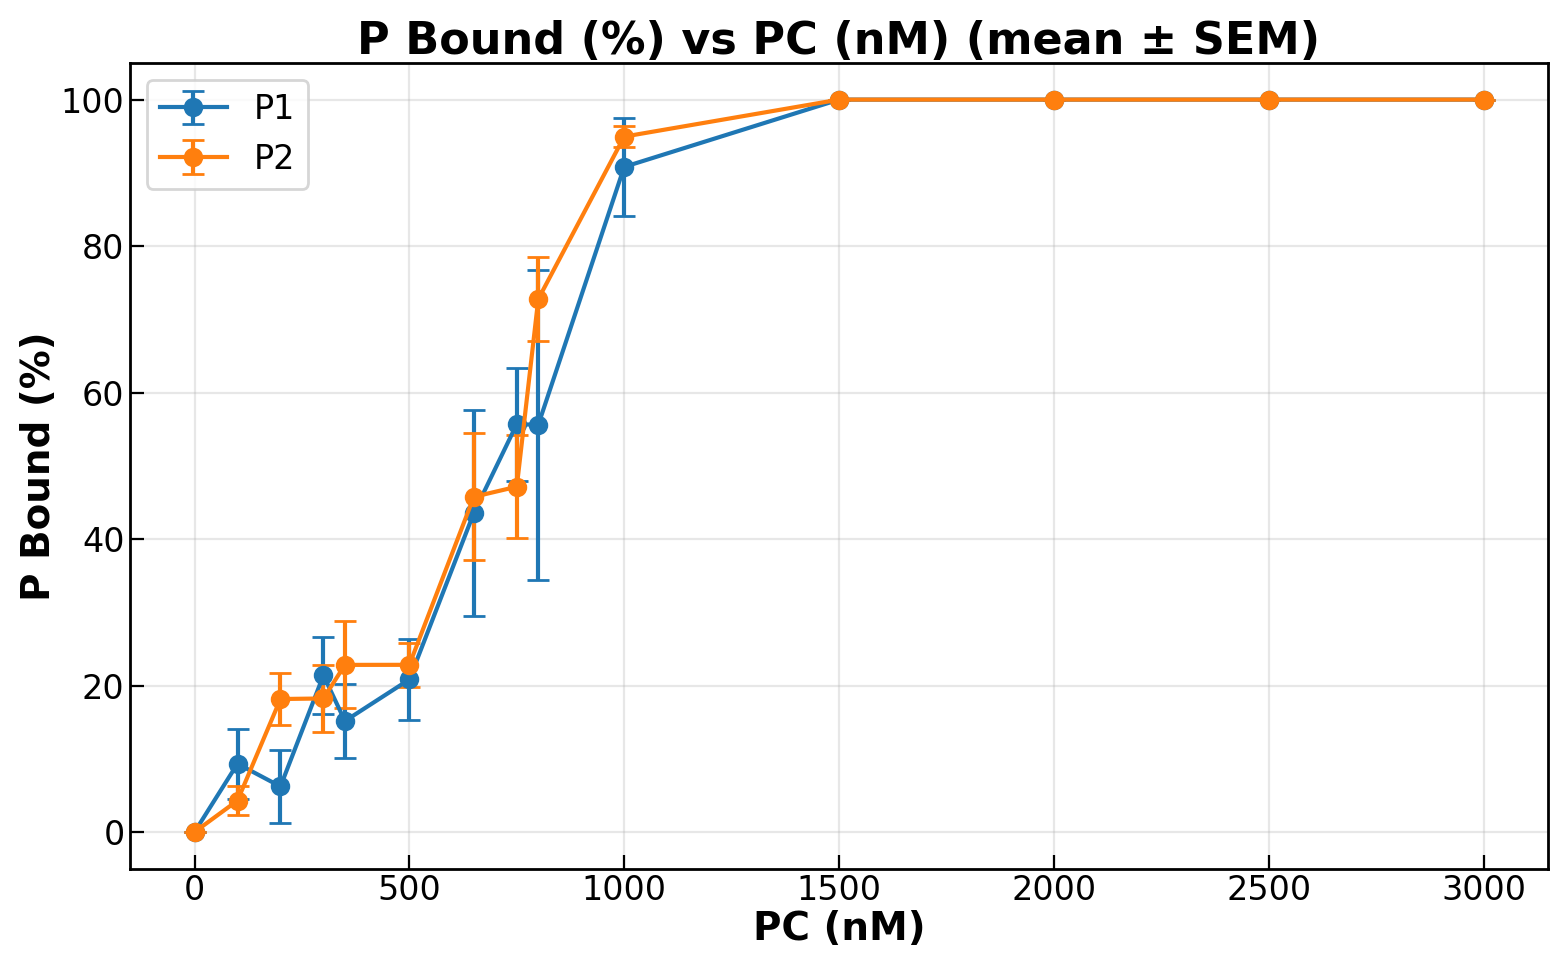

In [368]:

# Group and compute mean and SEM
statsP1 = (dfP1.groupby("P1C_nM")["P1_Bound_perc"]
           .agg(mean="mean", sem="sem")
           .reset_index()
           .sort_values("P1C_nM"))
statsP2 = (dfP2.groupby("P2C_nM")["P2_Bound_perc"]
           .agg(mean="mean", sem="sem")
           .reset_index()
           .sort_values("P2C_nM"))

# Plot mean ± SEM
plt.figure(figsize=(8,5))
plt.errorbar(statsP1["P1C_nM"], statsP1["mean"], yerr=statsP1["sem"],
             fmt="o-", capsize=4, color="tab:blue", ecolor="tab:blue")
plt.errorbar(statsP2["P2C_nM"], statsP2["mean"], yerr=statsP2["sem"],
             fmt="o-", capsize=4, color="tab:orange", ecolor="tab:orange")
plt.xlabel("PC (nM)")
plt.ylabel("P Bound (%)")
plt.title("P Bound (%) vs PC (nM) (mean ± SEM)")
plt.legend(["P1", "P2"], loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

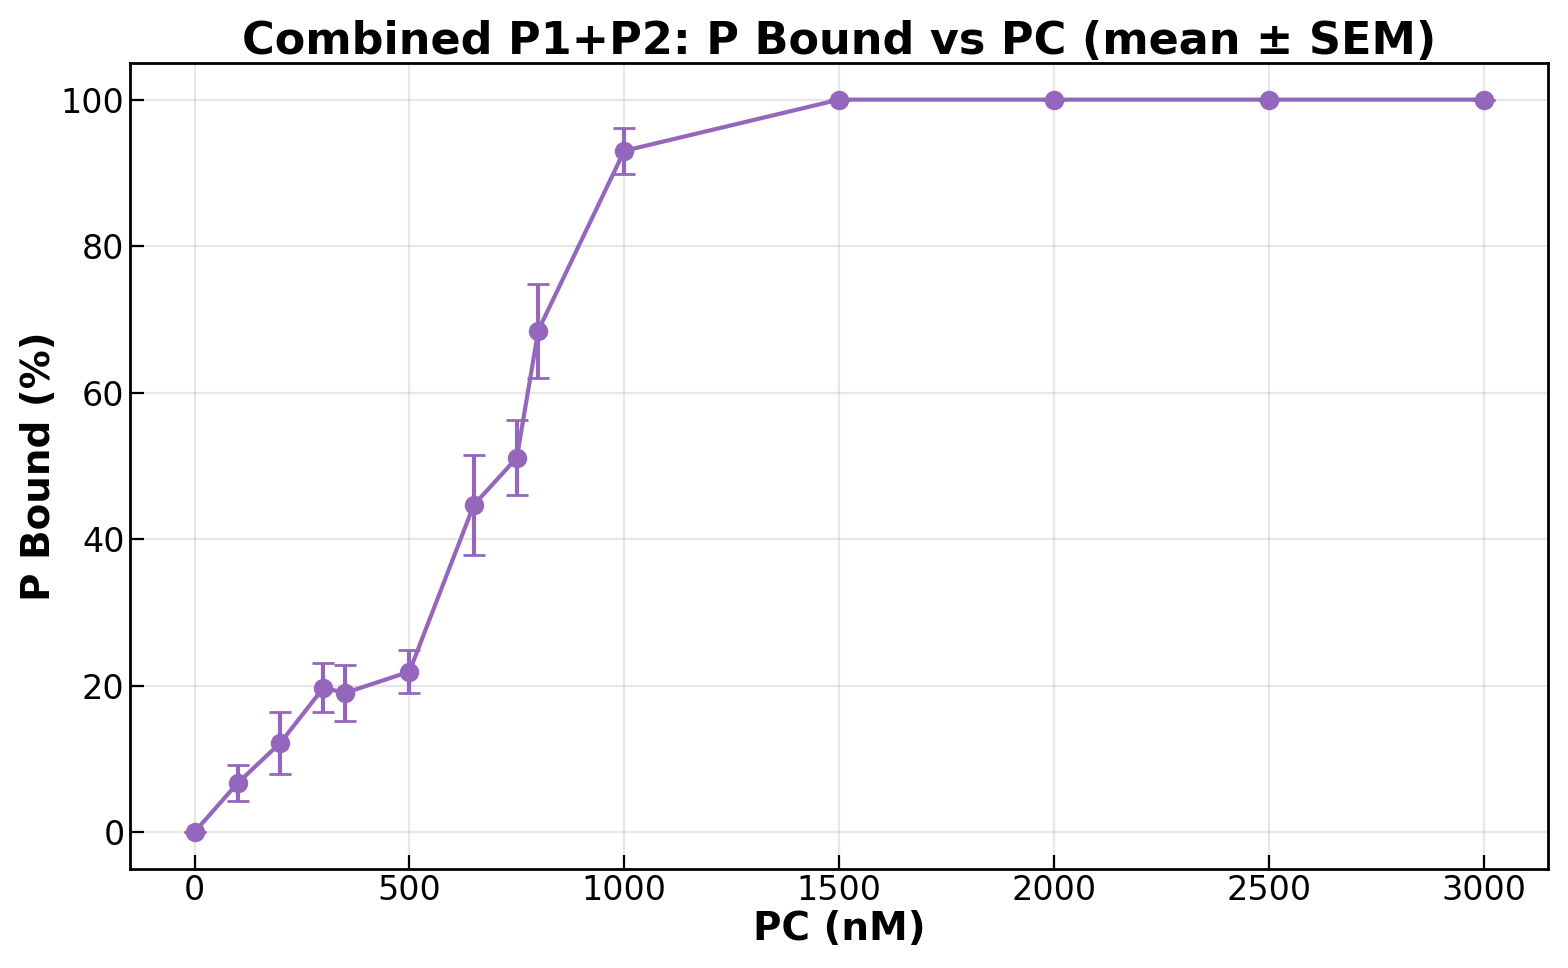

In [369]:
for df, ccol, pcol in [(dfP1, "P1C_nM", "P1_Bound_perc"), (dfP2, "P2C_nM", "P2_Bound_perc")]:
    df[ccol] = pd.to_numeric(df[ccol], errors="coerce")
    df[pcol] = pd.to_numeric(df[pcol], errors="coerce")
    df.loc[df[pcol] < 0, pcol] = 0

# Harmonize columns and combine
p1 = dfP1.rename(columns={"P1C_nM": "PC_nM", "P1_Bound_perc": "P_Bound_perc"})[["PC_nM", "P_Bound_perc"]]
p2 = dfP2.rename(columns={"P2C_nM": "PC_nM", "P2_Bound_perc": "P_Bound_perc"})[["PC_nM", "P_Bound_perc"]]
combined = pd.concat([p1, p2], ignore_index=True).dropna()

# Group by concentration and compute mean ± SEM
stats = (combined.groupby("PC_nM")["P_Bound_perc"]
         .agg(mean="mean", sem="sem")
         .reset_index()
         .sort_values("PC_nM"))

# Plot mean ± SEM
plt.figure(figsize=(8,5))
plt.errorbar(stats["PC_nM"], stats["mean"], yerr=stats["sem"],
             fmt="o-", capsize=4, color="tab:purple", ecolor="tab:purple")
plt.xlabel("PC (nM)")
plt.ylabel("P Bound (%)")
plt.title("Combined P1+P2: P Bound vs PC (mean ± SEM)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [370]:
stats

,PC_nM,mean,sem
0,0,0.000000,0.000000
1,100,6.665263,2.466017
2,200,12.190944,4.263258
3,300,19.696854,3.335972
4,350,18.989572,3.881453
5,500,21.891619,2.962062
6,650,44.666277,6.780604
7,750,51.091175,5.129737
8,800,68.473464,6.416207
9,1000,93.004737,3.144189


In [371]:

def get_emsa_arrays_from_df(
    df: pd.DataFrame,
    conc_candidates=("PC_nM", "conc_nM", "c_nM", "PC_nM".lower()),
    mean_candidates=("mean", "y", "P_Bound_perc"),
    sem_candidates=("sem", "SEM", "se")
):
   
    def pick_col(cands):
        cols_lower = {c.lower(): c for c in df.columns}
        for cand in cands:
            if cand.lower() in cols_lower:
                return cols_lower[cand.lower()]
        return None

    c_col = pick_col(conc_candidates)
    y_col = pick_col(mean_candidates)
    se_col = pick_col(sem_candidates)

    if c_col is None or y_col is None:
        raise ValueError(f"Could not find required columns. Found conc={c_col}, mean={y_col}")

    d = df[[c_col, y_col] + ([se_col] if se_col else [])].copy()
    d[c_col] = pd.to_numeric(d[c_col], errors="coerce")
    d[y_col] = pd.to_numeric(d[y_col], errors="coerce")
    if se_col:
        d[se_col] = pd.to_numeric(d[se_col], errors="coerce")

    d = d.dropna(subset=[c_col, y_col])
    c = d[c_col].to_numpy()
    y = d[y_col].to_numpy()
    se = d[se_col].to_numpy() if se_col and d[se_col].notna().any() else None
    return np.array(c), np.array(y), (np.array(se) if se is not None else None)

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import least_squares

# ---------- Transfer-matrix (finite-n) ----------

def transfer_matrix(f, K):
    """2x2 transfer matrix T and boundary vector b for f=beta*mu*, K=beta*J."""
    ef2 = np.exp(0.5 * f)
    T = np.array([[1.0, ef2],
                  [ef2, np.exp(f + K)]], dtype=float)
    b = np.array([1.0, ef2], dtype=float)
    return T, b

def d_transfer_matrix_df(f, K):
    """dT/df and db/df for exact finite-n dZ/df."""
    ef2 = np.exp(0.5 * f)
    dT = np.array([[0.0, 0.5 * ef2],
                   [0.5 * ef2, np.exp(f + K)]], dtype=float)
    db = np.array([0.0, 0.5 * ef2], dtype=float)
    return dT, db

def Zn_and_dZn_df(n, f, K):
    """Z_n(f,K)=b^T T^{n-1} b and its derivative dZ/df (open chain, finite n)."""
    T, b = transfer_matrix(f, K)
    dT, db = d_transfer_matrix_df(f, K)

    if n == 1:
        Z = float(b @ b)
        dZ = float((db @ b) + (b @ db))
        return Z, dZ

    #### Powers of T
    Tp = [np.eye(2)] # Start with T^0 = I (2*2 identity matrix)
    for _ in range(1, n):
        ### Iteratively append T^1, T^2, ..., T^(n−1).
        Tp.append(Tp[-1] @ T)
    ### After the loop, Tp[k] = T^k for k=0..n−1.
    Z = float(b.T @ (Tp[n-1] @ b))

    # d(T^{m})/df = sum_{k=0}^{m-1} T^k (dT/df) T^{m-1-k}
    m = n - 1
    dTpower = np.zeros((2, 2))
    for k in range(m):
        dTpower += Tp[k] @ dT @ Tp[m - 1 - k]

    dZ = float((d_transfer_matrix_df(f, K)[1].T @ (Tp[n-1] @ b))    # db^T T^{n-1} b
               + (b.T @ (Tp[n-1] @ d_transfer_matrix_df(f, K)[1]))  # b^T T^{n-1} db
               + (b.T @ (dTpower @ b)))                             # b^T d(T^{n-1})/df b
    return Z, dZ

def expected_number(n, f, K):
    """<N> = d ln Z / df (finite n). Not used for EMSA readout but kept for convenience."""
    Z, dZ = Zn_and_dZn_df(n, f, K)
    return dZ / Z

def frac_any_bound(n, f, K):
    """EMSA proxy: probability DNA is shifted (≥1 protamine bound) = 1 - 1/Z_n."""
    Z, _ = Zn_and_dZn_df(n, f, K)
    return 1.0 - 1.0 / Z

In [373]:

# ---------- Forward model for EMSA ----------

def f_from_c(c_uM, c0_uM):
    """f = ln(c / c0)."""
    eps = 1e-15
    return np.log((np.asarray(c_uM) + eps) / c0_uM)

def emsa_model(c_uM, n, log_c0, J, offset, scale):
    """
    % bound prediction (in same units as 'scale', typically 0-100):
      y(c) = offset + scale * [ 1 - 1/Z_n(f(c), K) ].
    """
    c0 = np.exp(log_c0)
    f = f_from_c(c_uM, c0)
    K = max(J, 0.0)  # enforce J >= 0
    g = np.array([frac_any_bound(n, fi, K) for fi in f])
    return offset + scale * g

In [374]:

####### ---------- Fitting ----------

def fit_emsa(PC_nM, mean_pct, sem_pct, n, label,
             J_fixed=None, offset_fixed=None, scale_fixed=None):
    """
    Weighted least squares. Parameters:
      log_c0 (free), J (unless fixed), offset (unless fixed), scale (unless fixed).
    """
    c_uM = np.asarray(PC_nM, float) * 1e-3  ##### nM -> uM
    y = np.asarray(mean_pct, float)
    if sem_pct is None:
        yerr = np.ones_like(y)
    else:
        yerr = np.asarray(sem_pct, float)
        yerr[yerr <= 0] = np.min(yerr[yerr > 0]) if np.any(yerr > 0) else 1.0
        print(f"Using {len(yerr)} yerr values, min={np.min(yerr)}, max={np.max(yerr)}")

    # Initial guesses
    # Half-maximum heuristic for c0; offset/scale from data min/max.
    y_min, y_max = float(np.nanmin(y)), float(np.nanmax(y))
    span = max(y_max - y_min, 1e-6)
    y_half = y_min + 0.5 * span
    idx = int(np.nanargmin(np.abs(y - y_half)))
    c0_guess = max(c_uM[idx], 1e-6)
    log_c0_0 = np.log(c0_guess)
    J0 = 0.2
    offset0 = y_min
    scale0 = span

    # Build parameter vector depending on fixed choices
    x0 = []
    lb = []
    ub = []

    # log_c0
    x0.append(log_c0_0); lb.append(-50.0); ub.append(+50.0)

    # J
    if J_fixed is None:
        x0.append(J0); lb.append(0.0); ub.append(10.0)
        idx_J = len(x0)-1
    else:
        idx_J = None

    # offset
    if offset_fixed is None:
        x0.append(offset0); lb.append(-np.inf); ub.append(+np.inf)
        idx_off = len(x0)-1
    else:
        idx_off = None

    # scale
    if scale_fixed is None:
        x0.append(scale0); lb.append(0.0); ub.append(+np.inf)
        idx_scale = len(x0)-1
    else:
        idx_scale = None

    x0 = np.array(x0, float)
    lb = np.array(lb, float)
    ub = np.array(ub, float)

    def unpack(theta):
        t = list(theta)
        # Start with log_c0
        log_c0 = t.pop(0)
        # J
        J = J_fixed if J_fixed is not None else t.pop(0)
        # offset
        offset = offset_fixed if offset_fixed is not None else t.pop(0)
        # scale
        scale = scale_fixed if scale_fixed is not None else t.pop(0)
        return log_c0, J, offset, scale

    def residuals(theta):
        log_c0, J, offset, scale = unpack(theta)
        yhat = emsa_model(c_uM, n, log_c0, J, offset, scale)
        return (yhat - y) / yerr

    res = least_squares(residuals, x0, bounds=(lb, ub), method="trf")
    r = residuals(res.x)
    RSS = float(np.sum(r**2))
    dof = max(1, len(y) - len(res.x))

    ##### Covariance (Gauss–Newton)
    try:
        JTJ_inv = inv(res.jac.T @ res.jac)
        s2 = RSS / dof
        cov = s2 * JTJ_inv
        se = np.sqrt(np.diag(cov))
    except Exception:
        cov = None; se = None

    # AIC/BIC
    k = len(res.x); npts = len(y)
    AIC = npts * np.log(RSS / npts) + 2 * k
    BIC = npts * np.log(RSS / npts) + k * np.log(npts)

    # Build full parameter vector (including fixed) for convenience
    log_c0, J, offset, scale = unpack(res.x)
    yhat = emsa_model(c_uM, n, log_c0, J, offset, scale)


    # Residuals in data units
    u = yhat - y
    # Unweighted RMSD (RMSE) in % units
    RMSD = float(np.sqrt(np.mean(u**2)))
    # Weighted RMSD (RMSE) in % units
    w = 1.0 / (yerr**2)
    wRMSD = float(np.sqrt(np.sum(w * u*u) / np.sum(w)))


    return {
        "label": label,
        "n": n,
        "x_opt": np.array([log_c0, J, offset, scale], float),
        "se": se, "cov": cov, "RSS": RSS, "AIC": AIC, "BIC": BIC, "dof": dof,
        "RMSD": RMSD, "wRMSD": wRMSD,
        "c_uM": c_uM, "y": y, "yerr": yerr, "yhat": yhat,
        "fixed": {"J": J_fixed, "offset": offset_fixed, "scale": scale_fixed}
    }

## Depletion Model Fitting Functions

In [375]:
from numpy.linalg import pinv
from scipy.optimize import least_squares
from scipy.linalg import inv

import numpy as np
from scipy.optimize import brentq

In [376]:



def emsa_model_anybound_with_mass_balance(c_tot_uM, n, log_c0, J, D_uM,
                                          enforce_J_nonneg=True):
    """
    Return (g, c_free) for each total concentration point, solving
        c_tot = c_free + D * ⟨N⟩(f,K), with f = ln(c_free/c0).
    Brackets the root in c_free ∈ [max(c_tot - D n, 0), c_tot], which
    *always* contains the solution, and is numerically stable.
    """
    c0 = np.exp(log_c0)
    K  = max(float(J), 0.0) if enforce_J_nonneg else float(J)
    c_tot_uM = np.asarray(c_tot_uM, dtype=float)

    g_vals = np.empty_like(c_tot_uM)
    c_free_vals = np.empty_like(c_tot_uM)

    for i, ctot in enumerate(c_tot_uM):
        # Physical bracket
        cL = max(ctot - D_uM * n, 0.0)
        cU = max(ctot, 1e-300)

        def F(cf):
            cf = max(float(cf), 1e-300)
            f  = np.log(cf / c0)
            Nbar = expected_number(n, f, K)
            return cf + D_uM * Nbar - ctot

        # Evaluate ends; they should satisfy F(cL) ≤ 0 ≤ F(cU)
        FL = F(cL)
        FU = F(cU)

        # Tiny ctot corner-case: if ctot==0, both endpoints may be roots.
        if abs(FL) < 1e-14:
            cf_star = cL
        elif abs(FU) < 1e-14:
            cf_star = cU
        else:
            # If, due to numerical noise, the signs don't differ, try once more
            # with a slightly enlarged bracket; otherwise fall back to cU.
            if not (np.isfinite(FL) and np.isfinite(FU) and (FL <= 0.0 <= FU)):
                try:
                    cf_star = brentq(F, max(0.0, 0.5*cL), max(cU*1.5, 1e-300), maxiter=100)
                except Exception:
                    cf_star = cU  # safe fallback: no depletion
            else:
                cf_star = brentq(F, cL, cU, maxiter=100)

        f_star = np.log(max(cf_star, 1e-300) / c0)
        # lnZ    = _logZ_open_dimless(n, f_star, K)
        g_vals[i]     = frac_any_bound(n, f_star, K)
        c_free_vals[i] = cf_star

        

    return g_vals, c_free_vals



In [377]:



def emsa_model_with_mass_balance(c_tot_uM, n, log_c0, J, offset, scale, D_uM):
    # uses the log-stable mass-balance helper you already added
    g_mb, _ = emsa_model_anybound_with_mass_balance(c_tot_uM, n, log_c0, J, D_uM)
    return offset + scale * g_mb

def fit_emsa_with_mass_balance(PC_nM, mean_pct, sem_pct, n, label, D_uM,
                               J_fixed=None, offset_fixed=None, scale_fixed=None):
    c_tot_uM = np.asarray(PC_nM, float) * 1e-3
    y = np.asarray(mean_pct, float)
    if sem_pct is None:
        yerr = np.ones_like(y)
    else:
        yerr = np.asarray(sem_pct, float)
        yerr[yerr <= 0] = np.min(yerr[yerr > 0]) if np.any(yerr > 0) else 1.0

    # initial guesses (same heuristics as your fit_emsa)
    y_min, y_max = float(np.nanmin(y)), float(np.nanmax(y))
    span = max(y_max - y_min, 1e-6)
    y_half = y_min + 0.5 * span
    idx = int(np.nanargmin(np.abs(y - y_half)))
    c0_guess = max(c_tot_uM[idx], 1e-6)
    log_c0_0 = np.log(c0_guess)    # crude but fine as a start
    J0 = 0.2
    offset0 = y_min
    scale0 = span

    x0, lb, ub = [], [], []
    # log_c0
    x0.append(log_c0_0); lb.append(-50.0); ub.append(+50.0)
    # J
    if J_fixed is None:
        x0.append(J0); lb.append(0.0); ub.append(10.0)
    # offset
    if offset_fixed is None:
        x0.append(offset0); lb.append(-np.inf); ub.append(+np.inf)
    # scale
    if scale_fixed is None:
        x0.append(scale0); lb.append(0.0); ub.append(+np.inf)

    x0 = np.array(x0, float); lb = np.array(lb, float); ub = np.array(ub, float)

    def unpack(theta):
        t = list(theta)
        log_c0 = t.pop(0)
        J = J_fixed if J_fixed is not None else t.pop(0)
        offset = offset_fixed if offset_fixed is not None else t.pop(0)
        scale = scale_fixed if scale_fixed is not None else t.pop(0)
        return log_c0, J, offset, scale

    def residuals(theta):
        log_c0, J, offset, scale = unpack(theta)
        yhat = emsa_model_with_mass_balance(c_tot_uM, n, log_c0, J, offset, scale, D_uM)
        return (yhat - y) / yerr

    res = least_squares(residuals, x0, bounds=(lb, ub), method="trf")
    r = residuals(res.x)
    RSS = float(np.sum(r**2))
    dof = max(1, len(y) - len(res.x))
    try:
        JTJ = res.jac.T @ res.jac
        JTJ_inv = pinv(JTJ)
        s2 = RSS / dof
        cov = s2 * JTJ_inv
        se = np.sqrt(np.diag(cov))
    except Exception:
        cov = None; se = None

    k = len(res.x); npts = len(y)
    AIC = npts * np.log(RSS / npts) + 2 * k
    BIC = npts * np.log(RSS / npts) + k * np.log(npts)

    log_c0, J, offset, scale = unpack(res.x)
    yhat = emsa_model_with_mass_balance(c_tot_uM, n, log_c0, J, offset, scale, D_uM)

    # Residuals in data units
    u = yhat - y
    # Unweighted RMSD (RMSE) in % units
    RMSD = float(np.sqrt(np.mean(u**2)))
    # Weighted RMSD (RMSE) in % units
    w = 1.0 / (yerr**2)
    wRMSD = float(np.sqrt(np.sum(w * u*u) / np.sum(w)))

    return {
        "label": label + " (mass balance)",
        "n": n, "x_opt": np.array([log_c0, J, offset, scale], float),
        "se": se, "cov": cov, "RSS": RSS, "AIC": AIC, "BIC": BIC, "dof": dof,
        "c_uM": c_tot_uM, "y": y, "yerr": yerr, "yhat": yhat,
        "RMSD": RMSD, "wRMSD": wRMSD,
        "fixed": {"J": J_fixed, "offset": offset_fixed, "scale": scale_fixed, "D_uM": D_uM}
    }



In [378]:
from scipy.optimize import minimize_scalar
import numpy as np

def profile_J_global(PC_nM, mean_pct, sem_pct, n, label,
                     J_values,
                     use_mass_balance=False, D_uM=None,
                     fix_offset=0.0, fix_scale=100.0,
                     bracket_expansion_decades=3.0):
    """
    Robust J-profile: for each fixed J in J_values, minimize RSS over log_c0
    via bounded 1-D search (minimize_scalar). Works with or without depletion.

    Parameters
    ----------
    PC_nM, mean_pct, sem_pct : arrays
        Data as in your fit functions (concentration in nM; y and SEM).
    n : int
        Number of lattice sites.
    label : str
        Label prefix for the result dicts.
    J_values : array-like
        Fixed J values (kBT units) at which to profile.
    use_mass_balance : bool
        If True, use the mass-balance forward model (requires D_uM).
    D_uM : float or None
        DNA concentration in µM (only used when use_mass_balance=True).
    fix_offset, fix_scale : floats
        Offset and scale to use (kept fixed during the profile).
    bracket_expansion_decades : float
        How far to expand the search bracket for log_c0 relative to the data
        range (in log10 decades). Default = ±3.

    Returns
    -------
    results : list of dict
        One result dict per J, same schema as fit_emsa / fit_emsa_with_mass_balance.
    """
    if use_mass_balance and (D_uM is None):
        raise ValueError("D_uM (DNA concentration in µM) is required when use_mass_balance=True")

    # Data and weights
    c_uM = np.asarray(PC_nM, float) * 1e-3  # nM -> µM
    y    = np.asarray(mean_pct, float)
    if sem_pct is None:
        yerr = np.ones_like(y)
    else:
        yerr = np.asarray(sem_pct, float)
        # prevent zero/neg weights
        if np.any(yerr <= 0):
            pos = yerr[yerr > 0]
            yerr[yerr <= 0] = np.min(pos) if pos.size else 1.0

    npts = len(y)

    # Build a *wide* but finite bracket for log_c0 (natural log)
    cpos = c_uM[c_uM > 0]
    if cpos.size == 0:
        # fallback if all concentrations are zero (unlikely)
        lo, hi = -20.0, +20.0
    else:
        log10_min = np.log10(np.min(cpos)) - bracket_expansion_decades
        log10_max = np.log10(np.max(cpos)) + bracket_expansion_decades
        lo, hi = log10_min * np.log(10.0), log10_max * np.log(10.0)

    results = []
    for Jg in np.asarray(J_values, float):
        # Objective: weighted RSS in terms of log_c0
        def rss_of_logc0(log_c0):
            if use_mass_balance:
                yhat = emsa_model_with_mass_balance(c_uM, n, log_c0, Jg,
                                                    fix_offset, fix_scale, D_uM)
            else:
                yhat = emsa_model(c_uM, n, log_c0, Jg, fix_offset, fix_scale)
            r = (yhat - y) / yerr
            return float(np.sum(r*r))

        # Global 1-D minimize with robust fallback
        res = minimize_scalar(rss_of_logc0, bounds=(lo, hi), method="bounded",
                              options=dict(xatol=1e-6, maxiter=800))
        if (not res.success) or (not np.isfinite(res.fun)):
            # Coarse grid fallback if line search fails
            grid = np.linspace(lo, hi, 401)
            rss_vals = [rss_of_logc0(v) for v in grid]
            idx = int(np.nanargmin(rss_vals))
            log_c0_opt = float(grid[idx])
            RSS = float(rss_vals[idx])
        else:
            log_c0_opt = float(res.x)
            RSS = float(res.fun)

        # AIC/BIC with k=1 (only log_c0 is free; J, offset, scale are fixed)
        k = 1
        AIC = npts * np.log(RSS / npts) + 2 * k
        BIC = npts * np.log(RSS / npts) + k * np.log(npts)

        # Build yhat for convenience and for refit-family plotting
        if use_mass_balance:
            yhat = emsa_model_with_mass_balance(c_uM, n, log_c0_opt, Jg,
                                                fix_offset, fix_scale, D_uM)
        else:
            yhat = emsa_model(c_uM, n, log_c0_opt, Jg, fix_offset, fix_scale)

        # Weighted RMSD (RMSE) in % units
        u = yhat - y
        w = 1.0 / (yerr**2)
        wRMSD = float(np.sqrt(np.sum(w * u*u) / np.sum(w)))
        # Unweighted RMSD (RMSE) in % units
        RMSD = float(np.sqrt(np.mean(u**2)))

        results.append({
            "label": f"{label} [profile J={Jg:.3g}]{' MB' if use_mass_balance else ''}",
            "n": n,
            "x_opt": np.array([log_c0_opt, Jg, fix_offset, fix_scale], float),
            "se": None, "cov": None,
            "RSS": RSS, "AIC": AIC, "BIC": BIC, "wRMSD": wRMSD, "RMSD": RMSD, "dof": max(1, npts - k),
            "c_uM": c_uM, "y": y, "yerr": yerr, "yhat": yhat,
            "fixed": {"J": Jg, "offset": fix_offset, "scale": fix_scale,
                      "use_mass_balance": use_mass_balance, "D_uM": D_uM}
        })

    return results




# # ...existing code...
# def plot_refit_family(results, use_mass_balance=False, D_uM=None,
#                       color_cycle=None, savepath=None,
#                       title="Refit curves at fixed J",
#                       color_by="J", top_k=5, show_colorbar=True, legend_loc="upper left"):
#     """
#     Plot data and properly refitted fixed-J curves.
#     - Colors encode either J or AIC (color_by).
#     - Legend shows only 'data' + top_k best curves (by AIC); best is bold.
#     """
#     res0 = results[0]
#     c = res0["c_uM"]; y = res0["y"]; yerr = res0["yerr"]; n = res0["n"]
#     cgrid = np.logspace(np.log10(max(min(c[c>0]), 1e-6)), np.log10(max(c)*1.2), 400)

#     # Scalars for coloring and ranking
#     Js   = np.array([r["x_opt"][1] for r in results])
#     AICs = np.array([r["wRMSD"] for r in results])
#     vals = Js if str(color_by).upper() == "J" else AICs
#     vlabel = "J (k_BT)" if str(color_by).upper() == "J" else "AIC"

#     # Colormap
#     norm = plt.Normalize(vmin=np.min(vals), vmax=np.max(vals))
#     cmap = plt.cm.viridis
#     sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

#     fig, ax = plt.subplots(figsize=(6.6, 4.4))
#     ax.errorbar(c, y, yerr, fmt="o", ms=4, capsize=2, label="data")

#     # Rank by AIC
#     order = np.argsort(AICs)
#     best_idx = int(order[0])
#     topk = set(order[:max(1, int(top_k))])

#     handles, labels = [], []
#     for i, r in enumerate(results):
#         log_c0, J_fixed, offset, scale = r["x_opt"]
#         if use_mass_balance:
#             yhat = emsa_model_with_mass_balance(cgrid, n, log_c0, J_fixed, offset, scale, D_uM)
#         else:
#             yhat = emsa_model(cgrid, n, log_c0, J_fixed, offset, scale)

#         col = sm.to_rgba(vals[i])
#         lw = 2.6 if i == best_idx else 1.5
#         alpha = 1.0 if i in topk else 0.5
#         z = 3 if i == best_idx else 2

#         line, = ax.plot(cgrid, yhat, color=col, lw=lw, alpha=alpha, zorder=z)
#         if i in topk:
#             handles.append(line)
#             labels.append(f"J={J_fixed:.2g}, AIC={r['AIC']:.1f}")

#     ax.set_xscale("log")
#     ax.set_xlabel("Protamine concentration (µM)")
#     ax.set_ylabel("% DNA shifted (EMSA)")
#     ax.set_title(title)

#     # Compact legend: data + top_k curves
#     h_data, l_data = ax.get_legend_handles_labels()
#     ax.legend(h_data + handles, l_data + labels, fontsize=8, loc=legend_loc, frameon=True)

#     if show_colorbar:
#         cbar = fig.colorbar(sm, ax=ax, pad=0.02)
#         cbar.set_label(vlabel)

#     fig.tight_layout()
#     if savepath:
#         fig.savefig(savepath, dpi=200)
#     plt.show()
# # ...existing code...

In [411]:
# ...existing code...
from matplotlib.colors import LogNorm
# ...existing code...
def plot_refit_family(results, use_mass_balance=False, D_uM=None,
                        savepath=None,
                        figsize=(7.8, 4.4),
                      title="Refit curves at fixed J",
                      color_by="J", 
                      top_k=5,
                      c0_panel_fraction=0.20,    # width fraction for side panel
                      c0_panel_pad=0.05,
                      c0_scatter_size=20,
                      c0_line=True):

    res0 = results[0]
    c = res0["c_uM"]; y = res0["y"]; yerr = res0["yerr"]; n = res0["n"]
    cgrid = np.logspace(np.log10(max(min(c[c>0]), 1e-6)), np.log10(max(c)*1.2), 400)

    # Scalars
    Js       = np.array([r["x_opt"][1] for r in results])
    log_c0s  = np.array([r["x_opt"][0] for r in results])
    c0s      = np.exp(log_c0s)
    wRMSD    = np.array([r["wRMSD"] for r in results])  # (kept as in your code)

    vals = Js if str(color_by).upper() == "J" else wRMSD
    vlabel = r"J $\mathbf{(k_B T)}$" if str(color_by).upper() == "J" else "wRMSD"

    from matplotlib import gridspec
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1.0, c0_panel_fraction],
                            wspace=c0_panel_pad)
    ax = fig.add_subplot(gs[0,0])
    ax_c0 = fig.add_subplot(gs[0,1], sharey=None)


    # Colormap for main curves
    norm = plt.Normalize(vmin=np.min(vals), vmax=np.max(vals))
    cmap = plt.cm.viridis
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

    ax.errorbar(c, y, yerr, fmt="o", ms=4, capsize=2, label="EMSA")

    # Rank by (wRMSD proxy)
    order = np.argsort(wRMSD)
    best_idx = int(order[0])
    topk = set(order[:max(1, int(top_k))])

    handles, labels = [], []
    for i, r in enumerate(results):
        log_c0, J_fixed, offset, scale = r["x_opt"]
        if use_mass_balance:
            yhat = emsa_model_with_mass_balance(cgrid, n, log_c0, J_fixed, offset, scale, D_uM)
        else:
            yhat = emsa_model(cgrid, n, log_c0, J_fixed, offset, scale)

        col = sm.to_rgba(vals[i])
        lw = 2.6 if i == best_idx else 1.2
        alpha = 1.0 if i in topk else 0.35
        z = 4 if i == best_idx else 2

        line, = ax.plot(cgrid, yhat, color=col, lw=lw, alpha=alpha, zorder=z)
        if i in topk:
            handles.append(line)
            labels.append(f"J={J_fixed:.2g}, wRMSD={r['wRMSD']:.1f}")

    ax.set_xscale("log")
    ax.set_xlabel(r"Protamine conc. $\mathbf{c\,(\mu M)}$")
    ax.set_ylabel(r"% Bound")
    ax.set_title(title)
    ax.minorticks_on()

    # Main colorbar (J or wRMSD)
    cbar = fig.colorbar(sm, ax=ax, pad=0.015)
    cbar.set_label(vlabel)


    # Mini plot: J vs c0
    ax_c0.set_title(r"$\mathbf{c_0}$ vs J", fontsize=11)
    # Sort by J for a line
    sJ = np.argsort(Js)

    if c0_line:
        ax_c0.plot(c0s[sJ],Js[sJ], color="k", lw=1.0, alpha=0.5)
    # Scatter colored by (same mapping as main or independent)
    sc = ax_c0.scatter(c0s,Js, c=Js, cmap=cmap, norm=norm,
                        s=c0_scatter_size, edgecolor="none")
    ax_c0.set_ylabel("J", fontsize=11)
    ax_c0.set_xlabel(r"$\mathbf{c_0}$", fontsize=11)
    ax_c0.set_xscale("log")
    ax_c0.tick_params(axis="y", labelsize=9)
    ax_c0.tick_params(axis="x", labelsize=9)
    ax_c0.grid(True, which='both', ls='--', lw=0.5, alpha=0.5)
    

    fig.tight_layout()
    if savepath:
        for ext in ["png", "pdf", "svg"]:
            plt.savefig(savepath/ f"nodep_Jfamily.{ext}",
                        dpi=300,
                        bbox_inches='tight', 
                        transparent=True)
    plt.show()
# ...existing code...

In [412]:

# Report to console
def report(tag, res):
    log_c0, J, offset, scale = res["x_opt"]
    print(f"[{tag}]  n={res['n']}")
    print(f"  log c0 = {log_c0:.3f}  (c0 = {np.exp(log_c0):.4g} µM)")
    print(f"  J = {J:.3f}  (k_B T units)")
    print(f"  offset = {offset:.3f} %,  scale = {scale:.3f} %")
    print(f"  RSS = {res['RSS']:.4g},  AIC = {res['AIC']:.2f},  BIC = {res['BIC']:.2f}")
    print(f"  wRMSD = {res['wRMSD']:.3f}, RMSD = {res['RMSD']:.3f}")
    if res["se"] is not None:
        print("  approx. 1SIGMA SE:", res["se"])

In [514]:


def plot_dep_results(result_freeJ, D_uM, result_J0=None, savepath=None, figure_size=(6.6, 4.4)):
    plt.figure(figsize=figure_size)
    c = result_freeJ["c_uM"]; y = result_freeJ["y"]; yerr = result_freeJ["yerr"]
    plt.errorbar(c, y, yerr, fmt="o", ms=4, capsize=2, label="EMSA")

    Js       = result_freeJ["x_opt"][1]
    log_c0s  = result_freeJ["x_opt"][0]
    c0_val   = np.exp(log_c0s)

    # Smooth curves
    cgrid = np.logspace(np.log10(max(min(c[c>0]), 1e-6)),
                        np.log10(max(c) * 1.2), 400)

    def curve(resdict, J_override=None):
        log_c0, J, offset, scale = resdict["x_opt"]
        if J_override is not None:
            J = J_override
        return emsa_model_with_mass_balance(cgrid, resdict["n"], log_c0, J, offset, scale, D_uM)


    label_text = fr"J={Js:.1f}, $\mathrm{{c_0}}$={c0_val:.1f} $\mathrm{{\mu M}}$, wRMSD={result_freeJ['wRMSD']:.1f}"
    plt.plot(cgrid, curve(result_freeJ), label=label_text)

    if result_J0 is not None:
        log_c0s = result_J0["x_opt"][0]
        c0_val   = np.exp(log_c0s)
        label_text = fr"J={0:.1f}, $\mathrm{{c_0}}$={c0_val:.1f} $\mathrm{{\mu M}}$, wRMSD={result_J0['wRMSD']:.1f}"

        plt.plot(cgrid, curve(result_J0), ls="--",
                 label=label_text)


    plt.xscale("log")
    plt.xlabel(r"Protamine conc. $\mathbf{c\,(\mu M)}$")
    plt.ylabel(r"% Bound")

    plt.minorticks_on()

    plt.title(result_freeJ["label"])
    plt.legend(fontsize=9, loc="upper left", frameon=True)
    plt.tight_layout()
    if savepath:
        for ext in ["png", "pdf", "svg"]:
            plt.savefig(savepath/ f"ESMA_dep_fit.{ext}",
                        dpi=300,
                        bbox_inches='tight', 
                        transparent=True)
    plt.show()

In [515]:


def plot_no_dep_results(result_freeJ, result_J0=None, savepath=None, figure_size=(6.6, 4.4)):
    plt.figure(figsize=figure_size)
    c = result_freeJ["c_uM"]; y = result_freeJ["y"]; yerr = result_freeJ["yerr"]
    plt.errorbar(c, y, yerr, fmt="o", ms=4, capsize=2, label="EMSA")
    
    Js       = result_freeJ["x_opt"][1]
    log_c0s  = result_freeJ["x_opt"][0]
    c0_val   = np.exp(log_c0s)
    
    # Smooth curves
    cgrid = np.logspace(np.log10(max(min(c[c>0]), 1e-6)),
                        np.log10(max(c) * 1.2), 400)

    def curve(resdict, J_override=None):
        log_c0, J, offset, scale = resdict["x_opt"]
        if J_override is not None:
            J = J_override
        return emsa_model(cgrid, resdict["n"], log_c0, J, offset, scale)

    label_text = fr"J={Js:.1f}, $\mathrm{{c_0}}$={c0_val:.1f} $\mathrm{{\mu M}}$, wRMSD={result_freeJ['wRMSD']:.1f}"

    plt.plot(cgrid, curve(result_freeJ), label=label_text)

    if result_J0 is not None:
        log_c0s = result_J0["x_opt"][0]
        c0_val   = np.exp(log_c0s)
        label_text = fr"J={0:.1f}, $\mathrm{{c_0}}$={c0_val:.1f} $\mathrm{{\mu M}}$, wRMSD={result_J0['wRMSD']:.1f}"
        plt.plot(cgrid, curve(result_J0), ls="--",
                 label=label_text)


    plt.xscale("log")
    plt.xlabel(r"Protamine conc. $\mathbf{c\,(\mu M)}$")
    plt.ylabel(r"% Bound")
    plt.minorticks_on()
    plt.title(result_freeJ["label"])
    plt.legend(fontsize=9, loc="upper left", frameon=True)
    plt.tight_layout()

    if savepath:
        for ext in ["png", "pdf", "svg"]:
            plt.savefig(savepath/ f"ESMA_nodep_fit.{ext}",
                        dpi=300,
                        bbox_inches='tight', 
                        transparent=True)
    plt.show()

In [516]:
def plot_wRMSD_vs_J_and_logc0(results, savepath=None,
                                     title="Profile: wRMSD vs J (top axis log c0)",
                                        figsize=(6.6, 4.4),
                                     use_c0=False,
                                     show_line=True,
                                     highlight_best=True,
                                     color_J="black", 
                                     color_lc0="silver",
                                     marker_J="o", marker_c0="s",
                                     alpha_line=0.30, 
                                     color_spines=True):
    """
    Plot wRMSD on the Y axis versus J on the bottom X axis and log c0 (or c0) on the top X axis.

    Parameters
    ----------
    results : list[dict]
        Output from profile_J_global.
    use_c0 : bool
        If True, top axis shows c0 (µM) with log scale; else shows log c0 linearly.
    """
    logc0s = np.array([r["x_opt"][0] for r in results])
    Js      = np.array([r["x_opt"][1] for r in results])
    wRMSDs  = np.array([r["wRMSD"]    for r in results])

    # Sort by J for a clean line
    order = np.argsort(Js)
    J_sorted = Js[order]
    w_sorted = wRMSDs[order]
    lc_sorted = logc0s[order]

    idx_best = int(np.argmin(w_sorted))

    fig, ax = plt.subplots(figsize=figsize)
    if show_line:
        ax.plot(J_sorted, w_sorted, "-", color=color_J, alpha=alpha_line, lw=1.2)

    hJ = ax.scatter(Js, wRMSDs, c=color_J, marker=marker_J, label="wRMSD vs J", zorder=3)

    ax.set_xlabel(r"J $\mathbf{(k_B T)}$")
    ax.set_ylabel("wRMSD")
    ax.set_title(title)
    ax.minorticks_on()

    # Color bottom axis (ticks + label + spine)
    ax.tick_params(axis="x", which="both", colors=color_J)
    ax.xaxis.label.set_color(color_J)
    if color_spines and "bottom" in ax.spines:
        ax.spines["bottom"].set_color(color_J)

    # Top axis: independent x for log c0 or c0
    ax_top = ax.twiny()
    if use_c0:
        c0s = np.exp(logc0s)
        c0_sorted = np.exp(lc_sorted)
        if show_line:
            ax_top.plot(c0_sorted, w_sorted, "-", color=color_lc0, lw=1.2, alpha=0.7)
        ax_top.scatter(c0s, wRMSDs, color=color_lc0, marker=marker_c0, s=34,
                       zorder=3, label="c0")
        ax_top.set_xscale("log")
        ax_top.set_xlabel(r"$\mathbf{c_0\,(\mu M)}$", color=color_lc0, labelpad=-12)
    else:
        if show_line:
            ax_top.plot(lc_sorted, w_sorted, "-", color=color_lc0, lw=1.2, alpha=0.7)
        ax_top.scatter(logc0s, wRMSDs, color=color_lc0, marker=marker_c0, s=34,
                       zorder=3, label="log c0")
        ax_top.set_xlabel(r"$\mathbf{log\,c_0\,(\mu M)}$", color=color_lc0, labelpad=-12)

      # Color top axis (ticks + label + spine)
    ax_top.tick_params(axis="x", which="both", colors=color_lc0)
    ax_top.xaxis.label.set_color(color_lc0)
    ax_top.xaxis.label.set_verticalalignment("bottom")
    if color_spines and "top" in ax_top.spines:
        ax_top.spines["top"].set_color("black")

    # Add scatter for top axis variable (ghost for legend) by transforming J positions
    # Just reuse points; visual separation by color not needed on top
    # Best point highlight (both axes)
    if highlight_best:
        ax.scatter(Js[idx_best], wRMSDs[idx_best],
                   s=90, facecolor="white", edgecolor=color_J, lw=1.6, zorder=5)
        ax_top.scatter((np.exp(logc0s[idx_best]) if use_c0 else logc0s[idx_best]),
                       wRMSDs[idx_best],
                       s=90, facecolor="white", edgecolor=color_lc0, lw=1.6, zorder=5)
        ax.axhline(wRMSDs[idx_best], ls="--", lw=0.9, color="gray", alpha=0.6)

    # Title (suptitle to avoid collision)
    fig.tight_layout()
    if savepath:
        for ext in ["png", "pdf", "svg"]:
            plt.savefig(savepath/ f"JvsC0_nodep_fit.{ext}",
                        dpi=300,
                        bbox_inches='tight', 
                        transparent=True)
    plt.show()

    return {"J": Js, "log_c0": logc0s, "wRMSD": wRMSDs,
            "idx_best": int(np.argmin(wRMSDs))}

In [517]:
def main(n=14, label="EMSA fit",
         fix_J=None, fix_offset=None, fix_scale=None,
         savefig=None):


    PC_nM, mean_pct, sem_pct = get_emsa_arrays_from_df(stats)

    res_free = fit_emsa(PC_nM, mean_pct, 
                        sem_pct, n=n, 
                        label=label,
                        J_fixed=fix_J, 
                        offset_fixed=fix_offset, 
                        scale_fixed=fix_scale)
    
    #### Fit comparator with J=0 only if not already fixed
    res_J0 = None
    if fix_J is None:
        res_J0 = fit_emsa(PC_nM, mean_pct, sem_pct, n=n,
                          label=label + " (J=0)",
                          J_fixed=0.0, offset_fixed=fix_offset, scale_fixed=fix_scale)


    report("free J" if fix_J is None else "fixed J", res_free)
    if res_J0 is not None:
        report("J=0", res_J0)

    plot_no_dep_results(res_free, res_J0, savepath=savefig, figure_size=(5.4, 4.2))



    D_uM = 0.04  # 40 nM DNA
    res_mb = fit_emsa_with_mass_balance(PC_nM, mean_pct, sem_pct, n=n, label=label,
                                        D_uM=D_uM, J_fixed=fix_J,
                                        offset_fixed=fix_offset, scale_fixed=fix_scale)
    

    resmb_J0 = None
    if fix_J is None:
        resmb_J0 = fit_emsa_with_mass_balance(PC_nM, mean_pct, sem_pct, n=n, label=label,
                                        D_uM=D_uM, J_fixed=0.0,
                                        offset_fixed=fix_offset, scale_fixed=fix_scale)

    report("mass balance free J", res_mb)
    if resmb_J0 is not None:
        report("J=0", resmb_J0)

    plot_dep_results(res_mb, D_uM, resmb_J0, savepath=savefig, figure_size=(5.4, 4.2))



    print("No depletion:   wRSMD =", res_free["wRMSD"], "params =", res_free["x_opt"])
    print("With depletion: wRSMD =", res_mb["wRMSD"],   "params =", res_mb["x_opt"])


    ##comparsion between the two fits
    # plot_mass_balance_fits(res_free, res_mb, D_uM)





    J_grid = np.linspace(0.0, 8, 50)   # for example
    # Profile with the model you are using in the paper (no depletion, offset/scale fixed)
    res_prof = profile_J_global(PC_nM, mean_pct, sem_pct, n=30, label="EMSA",
                            J_values=J_grid, fix_offset=0.0, fix_scale=100.0)
    plot_wRMSD_vs_J_and_logc0(res_prof, use_c0=True, title=None, savepath=savefig, figsize=(4.2, 4.4))

    # # Optional: visualize the properly refitted curves for each fixed J
    # plot_refit_family(res_prof, use_mass_balance=False,
    #                 title="Refitted fixed-J curves (no depletion)")


    plot_refit_family(res_prof, use_mass_balance=False, title=None, savepath=savefig, figsize=(6.6, 4.4))


    # D_uM = 0.04
    # res_prof_MB = profile_J_global(PC_nM, mean_pct, sem_pct,
    #                             n=30, label="EMSA",
    #                             J_values=J_grid,
    #                             use_mass_balance=True, D_uM=D_uM,
    #                             fix_offset=0.0, fix_scale=100.0, 
    #                             bracket_expansion_decades=10.0)

    # plot_profile_J(res_prof_MB, which="AIC", title="Profile over J (with depletion)")
    # plot_refit_family(res_prof_MB, use_mass_balance=True, D_uM=D_uM,
    #                 title="Refitted fixed-J curves (with depletion)")

Using 14 yerr values, min=2.4660174894948796, max=6.780604012212843
Using 14 yerr values, min=2.4660174894948796, max=6.780604012212843
[free J]  n=30
  log c0 = 4.496  (c0 = 89.7 µM)
  J = 4.505  (k_B T units)
  offset = 0.000 %,  scale = 100.000 %
  RSS = 11.94,  AIC = 1.77,  BIC = 3.05
  wRMSD = 2.824, RMSD = 3.386
  approx. 1SIGMA SE: [0.11318029 0.15080061]
[J=0]  n=30
  log c0 = 3.156  (c0 = 23.49 µM)
  J = 0.000  (k_B T units)
  offset = 0.000 %,  scale = 100.000 %
  RSS = 224.9,  AIC = 40.87,  BIC = 41.51
  wRMSD = 12.256, RMSD = 12.681
  approx. 1SIGMA SE: [0.1511026]


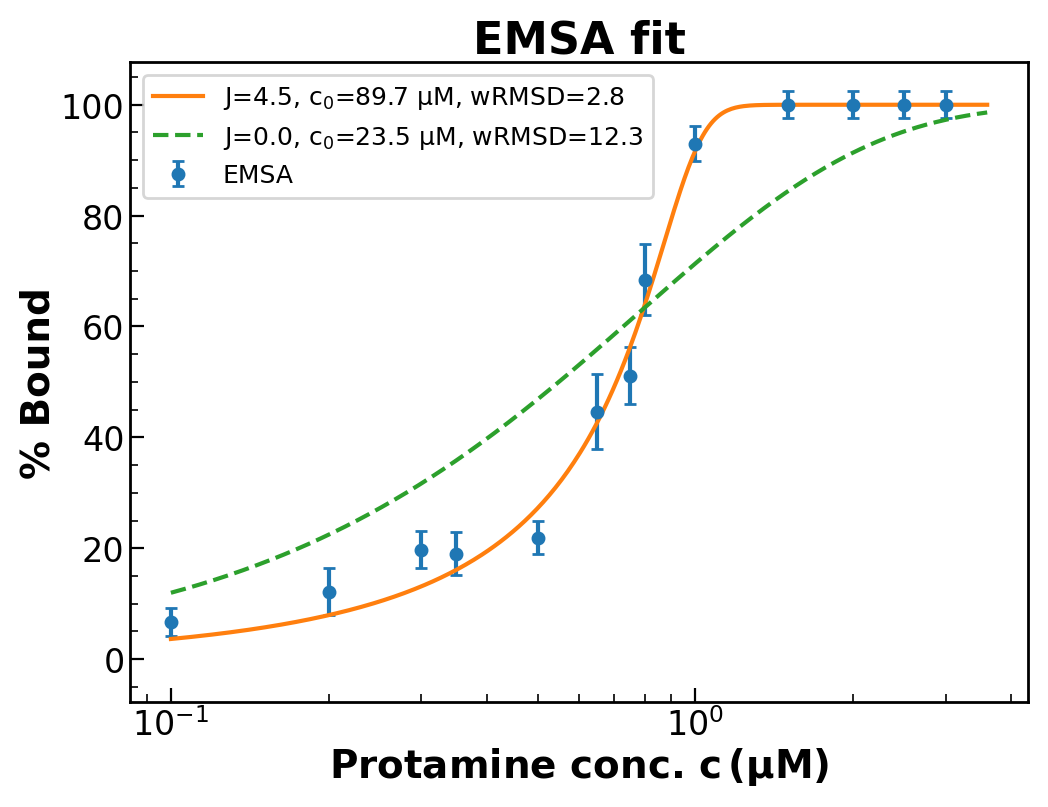

[mass balance free J]  n=30
  log c0 = 4.484  (c0 = 88.62 µM)
  J = 4.805  (k_B T units)
  offset = 0.000 %,  scale = 100.000 %
  RSS = 39.62,  AIC = 18.56,  BIC = 19.84
  wRMSD = 5.144, RMSD = 5.672
  approx. 1SIGMA SE: [0.44993048 0.76507823]
[J=0]  n=30
  log c0 = 3.106  (c0 = 22.32 µM)
  J = 0.000  (k_B T units)
  offset = 0.000 %,  scale = 100.000 %
  RSS = 224.1,  AIC = 40.82,  BIC = 41.46
  wRMSD = 12.234, RMSD = 12.663
  approx. 1SIGMA SE: [0.15850111]


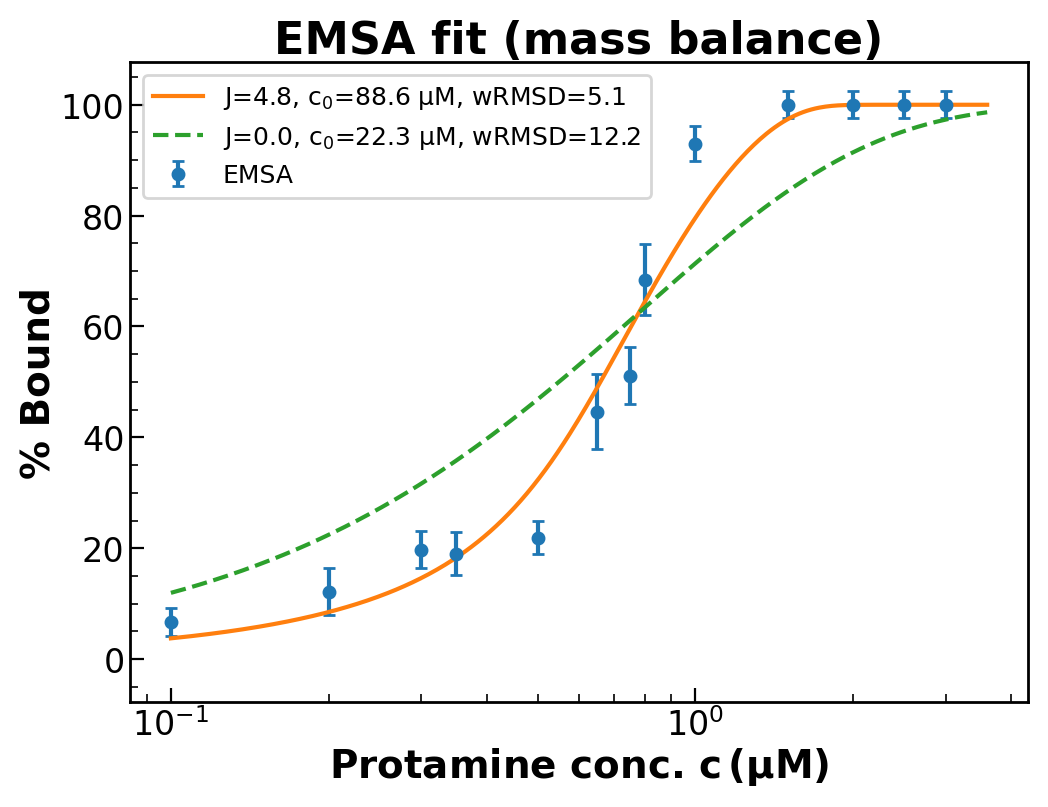

No depletion:   wRSMD = 2.824104728429935 params = [  4.49647737   4.5045049    0.         100.        ]
With depletion: wRSMD = 5.144328027432186 params = [  4.4843049    4.80464135   0.         100.        ]


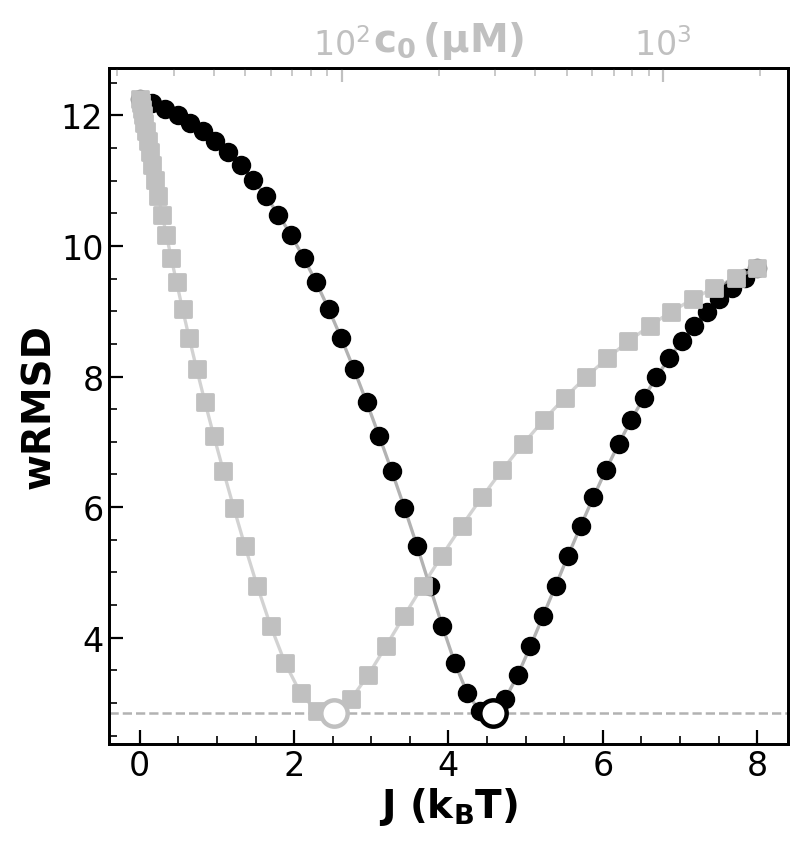

/tmp/ipykernel_1535113/659787832.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


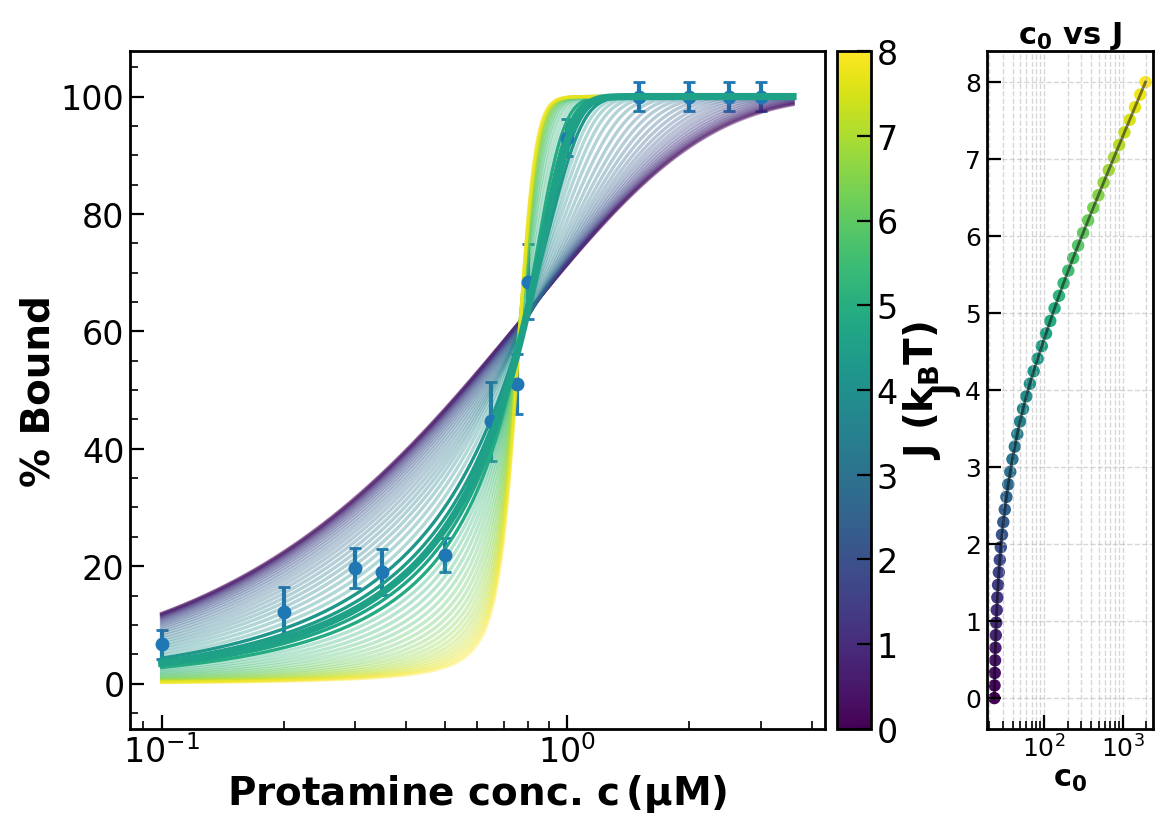

In [518]:


main(n=30, label="EMSA fit",
         fix_J=None, fix_offset=0.0, fix_scale=100.0,
         savefig=thesis_dir / "Chapter_HistProt/Protamine_Model")
